In [63]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA


%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [15]:
np.random.seed(1412)

In [151]:
price_quantity = np.random.randn(4100,2)

In [152]:
base_price_quantity = price_quantity[0]

In [153]:
initialDF = pd.DataFrame(price_quantity,columns=["price","quantity"])
initialDF.head()

,price,quantity
0,-1.169042,-0.390775
1,-1.093129,-1.127450
2,-0.304307,0.002182
3,-0.452348,-0.182037
4,1.863999,0.309174


In [154]:
initialDF['cpi'] = pd.Series(initialDF["price"] * initialDF["quantity"]/base_price_quantity[0] * base_price_quantity[1])
initialDF.head()

,price,quantity,cpi
0,-1.169042,-0.390775,0.152705
1,-1.093129,-1.127450,0.411970
2,-0.304307,0.002182,-0.000222
3,-0.452348,-0.182037,0.027525
4,1.863999,0.309174,0.192640


In [30]:
cpi_index = pd.read_csv("data/CPIndex_Jan13-To-Jul19.csv")
cpi_index.head()

,Year,Month,State,Group,Sub Group,Description,Rural,Urban,Combined,Status,Unnamed: 10
0,2013,January,ALL India,1.0,1.1.01,Cereals and products,107.5,110.5,108.4,F,NaN
1,2013,February,ALL India,1.0,1.1.01,Cereals and products,109.2,112.9,110.4,F,NaN
2,2013,March,ALL India,1.0,1.1.01,Cereals and products,110.2,113.9,111.4,F,NaN
3,2013,April,ALL India,1.0,1.1.01,Cereals and products,110.2,114.6,111.6,F,NaN
4,2013,May,ALL India,1.0,1.1.01,Cereals and products,110.9,115.4,112.3,F,NaN


In [29]:
list(cpi_index)

['(Base 2012=100)']

In [37]:
fuel_cpi_index = cpi_index[cpi_index.Group==5.0]
fuel_cpi_index.head()

,Year,Month,State,Group,Sub Group,Description,Rural,Urban,Combined,Status,Unnamed: 10
1422,2013,January,ALL India,5.0,NaN,Fuel and light,105.5,105.4,105.5,F,NaN
1423,2013,February,ALL India,5.0,NaN,Fuel and light,106.2,105.7,106.0,F,NaN
1424,2013,March,ALL India,5.0,NaN,Fuel and light,106.1,106.0,106.1,F,NaN
1425,2013,April,ALL India,5.0,NaN,Fuel and light,106.5,106.4,106.5,F,NaN
1426,2013,May,ALL India,5.0,NaN,Fuel and light,107.5,107.2,107.4,F,NaN


In [57]:
combined_fuel_cpi = fuel_cpi_index[['Year', 'Month','Combined']]
months = {"January" : 1, "February" : 2, "March" : 3, "April" : 4, "May": 5, "June" : 6, "July" : 7, "August" : 8, "September" : 9, "October" : 10, "November" : 11, "December" : 12}
combined_fuel_cpi['Month'] = combined_fuel_cpi['Month'].map(lambda x: months[x])
combined_fuel_cpi['Timestamp'] = pd.to_datetime({'year' : combined_fuel_cpi['Year'], 'month' : combined_fuel_cpi['Month'], 'day':[1] * combined_fuel_cpi.shape[0]})
combined_fuel_cpi.head()

C:\Users\Lenovo\Anaconda3\envs\ml37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Lenovo\Anaconda3\envs\ml37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Year,Month,Combined,Timestamp
1422,2013,1,105.5,2013-01-01
1423,2013,2,106.0,2013-02-01
1424,2013,3,106.1,2013-03-01
1425,2013,4,106.5,2013-04-01
1426,2013,5,107.4,2013-05-01


In [58]:
combined_fuel_cpi = combined_fuel_cpi.set_index("Timestamp")
combined_fuel_cpi.head()

,Year,Month,Combined
Timestamp,,,
2013-01-01,2013,1,105.5
2013-02-01,2013,2,106.0
2013-03-01,2013,3,106.1
2013-04-01,2013,4,106.5
2013-05-01,2013,5,107.4


In [59]:
combined_fuel_cpi = combined_fuel_cpi.drop(["Year", "Month"], axis = 1)
combined_fuel_cpi.head()

,Combined
Timestamp,
2013-01-01,105.5
2013-02-01,106.0
2013-03-01,106.1
2013-04-01,106.5
2013-05-01,107.4


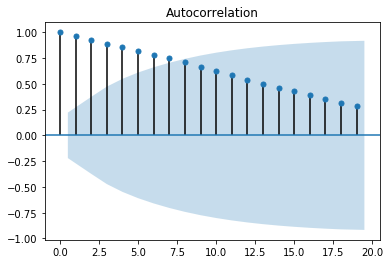

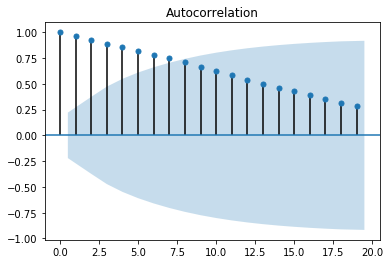

In [77]:
plot_acf(combined_fuel_cpi.values)

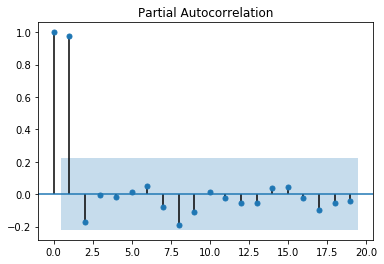

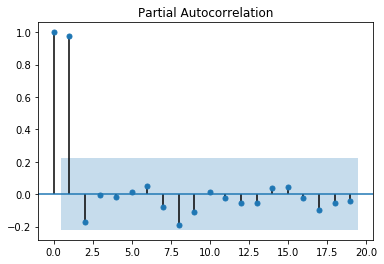

In [78]:
plot_pacf(combined_fuel_cpi.values)

In [95]:
total_dataset_size = len(combined_fuel_cpi.values)

In [96]:
arima_model = ARIMA(combined_fuel_cpi.values[:int(0.7 * total_dataset_size)], order = (1, 1, 1))

In [97]:
arima_results = arima_model.fit(disp=0)

In [98]:
arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   54
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -27.216
Method:                       css-mle   S.D. of innovations              0.400
Date:                Tue, 10 Sep 2019   AIC                             62.431
Time:                        17:33:33   BIC                             70.387
Sample:                             1   HQIC                            65.500
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4457      0.069      6.466      0.000       0.311       0.581
ar.L1.D.y     -0.2187      0.343     -0.637      0.527      -0.892       0.455
ma.L1.D.y      0.5475      0.292      1.872      0.067      -0.026       1.121
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -4.5729           +0.0000j            4.5729            0.5000
MA.1           -1.8265           +0.0000j            1.8265            0.5000
-----------------------------------------------------------------------------
"""

In [99]:
def normalize(x):
    return (x - x.min())/(x.max() - x.min())

In [100]:
normalized_combined_fuel_cpi = normalize(combined_fuel_cpi)
normalized_combined_fuel_cpi.head()

,Combined
Timestamp,
2013-01-01,0.000000
2013-02-01,0.012626
2013-03-01,0.015152
2013-04-01,0.025253
2013-05-01,0.047980


In [110]:
normalized_arima_model = ARIMA(normalized_combined_fuel_cpi.values[:int(0.7 * total_dataset_size)], order = (1, 1, 1))
normalized_arima_model_results = normalized_arima_model.fit()

In [111]:
normalized_arima_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   54
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 171.441
Method:                       css-mle   S.D. of innovations              0.010
Date:                Tue, 10 Sep 2019   AIC                           -334.882
Time:                        17:38:18   BIC                           -326.926
Sample:                             1   HQIC                          -331.814
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0113      0.002      6.466      0.000       0.008       0.015
ar.L1.D.y     -0.2187      0.343     -0.637      0.527      -0.892       0.455
ma.L1.D.y      0.5475      0.292      1.872      0.067      -0.026       1.121
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -4.5729           +0.0000j            4.5729            0.5000
MA.1           -1.8265           +0.0000j            1.8265            0.5000
-----------------------------------------------------------------------------
"""

In [107]:
print(combined_fuel_cpi.values[int(0.7 * total_dataset_size):])
arima_results.forecast(total_dataset_size - int(0.7 * total_dataset_size))[0]

[[129.8]
 [131. ]
 [132.2]
 [135.3]
 [136.6]
 [136.6]
 [136.7]
 [136.5]
 [136.5]
 [136.9]
 [138.1]
 [139.7]
 [140.9]
 [142.3]
 [143.5]
 [145.1]
 [142.7]
 [139.5]
 [138.4]
 [139.7]
 [140. ]
 [140.3]
 [141.2]
 [139.2]]


array([129.99259318, 130.40612926, 130.85882169, 131.30295138,
       131.74895358, 132.19454629, 132.64022855, 133.08589123,
       133.5315582 , 133.97722422, 134.42289045, 134.86855664,
       135.31422283, 135.75988902, 136.20555522, 136.65122141,
       137.0968876 , 137.54255379, 137.98821999, 138.43388618,
       138.87955237, 139.32521857, 139.77088476, 140.21655095])

In [112]:
print(normalized_combined_fuel_cpi.values[int(0.7 * total_dataset_size):])
normalized_arima_model_results.forecast(total_dataset_size - int(0.7 * total_dataset_size))[0]

[[0.61363636]
 [0.64393939]
 [0.67424242]
 [0.75252525]
 [0.78535354]
 [0.78535354]
 [0.78787879]
 [0.78282828]
 [0.78282828]
 [0.79292929]
 [0.82323232]
 [0.86363636]
 [0.89393939]
 [0.92929293]
 [0.95959596]
 [1.        ]
 [0.93939394]
 [0.85858586]
 [0.83080808]
 [0.86363636]
 [0.87121212]
 [0.87878788]
 [0.90151515]
 [0.8510101 ]]


array([0.61849982, 0.62894264, 0.64037427, 0.65158966, 0.66285234,
       0.67410467, 0.68535927, 0.69661337, 0.70786758, 0.71912177,
       0.73037596, 0.74163016, 0.75288435, 0.76413854, 0.77539273,
       0.78664692, 0.79790112, 0.80915531, 0.8204095 , 0.83166369,
       0.84291788, 0.85417208, 0.86542627, 0.87668046])

In [113]:
initialDF.head()

,price,quantity,cpi
0,2.336519,2.506932,6.284707
1,1.901742,1.294405,2.641161
2,3.111341,1.233276,4.117003
3,3.079198,-0.110384,-0.364684
4,1.348023,0.492986,0.713025


In [131]:
pd.date_range(end='2019-09-01',periods = 4100, freq = 'MS')

DatetimeIndex(['1678-02-01', '1678-03-01', '1678-04-01', '1678-05-01',
               '1678-06-01', '1678-07-01', '1678-08-01', '1678-09-01',
               '1678-10-01', '1678-11-01',
               ...
               '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01',
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01'],
              dtype='datetime64[ns]', length=4100, freq='MS')

In [155]:
initalDF_total_size = initialDF.shape[0]

In [156]:
initialDF = initialDF.set_index(pd.date_range(end='2019-09-01', periods = initalDF_total_size, freq = 'MS'))

In [157]:
initialDF = initialDF.drop(['price','quantity'], axis = 1)
initialDF.head()

,cpi
1678-02-01,0.152705
1678-03-01,0.411970
1678-04-01,-0.000222
1678-05-01,0.027525
1678-06-01,0.192640


In [158]:
initialDF_arima_model = ARIMA(initialDF.values[:int(0.7 * initalDF_total_size)], order = (1, 1, 1))
initialDF_arima_model_results = initialDF_arima_model.fit(disp = 0)

In [ ]:
initialDF_arima_model_results.summary()

In [ ]:
print(initialDF.values[int(0.7 * initalDF_total_size): int(0.7 * initalDF_total_size) + 10])
print(initialDF_arima_model_results.predict(10))